Name: Barry O' Dubhain

Student ID: 21384401

The question I have chosen to investigate is, which features best correlate with the target feature (subscribed) and are any of the features other highly correlated with each other indicating that they may be superfluous, allowing them to be safely ignored and the dataset reduced in size and complexity.

This is a description of the what the attributes represent.

#### Input variables:
#### bank client data:
1. **age**: age of client (numeric)
2. **job**: type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **balance**: the balance in the clients current account
7. **housing**: has housing loan? (categorical: 'no','yes','unknown')
8. **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
9. **contact**: contact communication type (categorical: 'cellular','telephone')
10. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
13. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. **previous**: number of contacts performed before this campaign and for this client (numeric)
16. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
17. **subscribed**: has the client subscribed a term deposit? (binary: 'yes','no')

source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('./bank.csv')

In [34]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [35]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [36]:
print(f"There are {len(df.columns.values) -1} features in the dataset not including the target feature (subscribed).")

There are 16 features in the dataset not including the target feature (subscribed).


We can see that the dataset has 2000 examples, with 17 attributes consisting of both numerical and categorical types. The last attribute 'subscribed' indicates whether the individual is subscribed to a term deposit. This attribute would be a primary candidate for an attribute to learn to predict from the values of the other attributes.

In [37]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1988.000000,1990,2000,1896,2000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,no
freq,NaN,461,1111,995,1985,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,41.753018,NaN,NaN,NaN,NaN,1413.663500,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,12.724358,NaN,NaN,NaN,NaN,3131.224213,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-980.000000,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,201.500000,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,551.000000,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,1644.500000,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


There are a few inferences we can draw by looking at the output of describe():

    'age' has 12 missing values.
    'job' has 10 missing values.
    'education has 104 missing values.
    'contact' has 191 missing values.
    'poutcome' has 454 missing values.


We can also examine the correlation matrix of all attributes in the form of a heat map. in oeder to view the correlation matrix of categorical we will have to convert them to numerical values.

In [38]:
def convert_categorical_features(input_df):
    new_df = input_df.copy(deep=True)
    for idx, attribute in enumerate(list(new_df.columns.values)):
        if new_df[attribute].dtypes == object:
            new_df[attribute] = new_df[attribute].replace(new_df[attribute].unique(), 
                                                          [i for i in range(len(new_df[attribute].unique()))])
    return new_df

In [39]:
df2 = convert_categorical_features(df)

In [40]:
df2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,0,0,0,0,392,0,0,0,1,0,957,2,131,2,0,0
1,39.0,0,1,1,0,688,0,1,0,1,0,233,2,133,1,0,0
2,59.0,1,2,1,0,1035,0,1,0,1,0,126,2,239,1,0,0
3,47.0,2,2,1,0,398,0,1,0,1,0,274,1,238,2,0,0
4,54.0,1,2,1,0,1004,0,0,0,1,0,479,1,307,1,0,0


In [41]:
df2.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,8,0,2,0,2785,1,0,0,16,11,327,2,-1,0,3,1
1996,28.0,6,0,1,0,127,1,0,0,16,11,1334,2,-1,0,3,1
1997,81.0,1,2,3,0,1154,1,0,1,17,11,231,1,-1,0,3,1
1998,46.0,4,2,3,0,4343,0,0,2,20,11,185,1,-1,0,3,1
1999,40.0,9,2,1,0,6403,1,0,0,22,11,208,2,-1,0,3,1


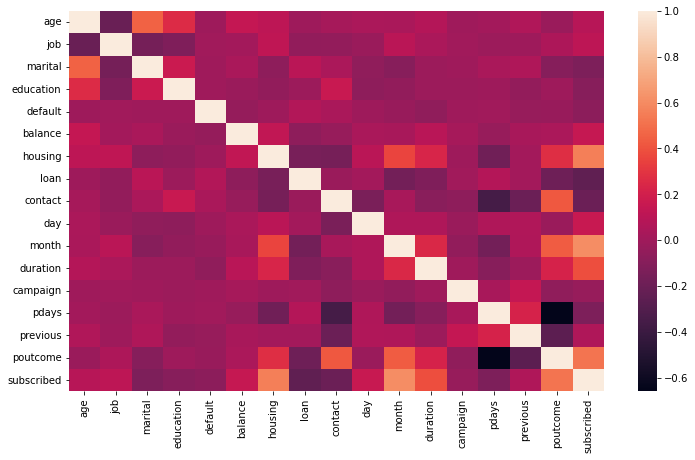

In [42]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df2.corr());

We can also view the numerical correlation values

In [43]:
df2.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.211767,0.453672,0.259832,-0.009241,0.139874,0.112506,-0.007030,0.021304,0.042411,0.034176,0.076732,-0.002876,0.009121,0.063805,-0.024565,0.085983
job,-0.211767,1.000000,-0.163162,-0.122752,0.001397,0.013621,0.118897,-0.052589,-0.050139,-0.019112,0.101165,0.042994,0.007765,-0.011932,-0.008834,0.049531,0.117334
marital,0.453672,-0.163162,1.000000,0.169678,-0.001750,0.036302,-0.069228,0.099312,0.046127,-0.058330,-0.090650,-0.017135,-0.001757,0.034694,0.054182,-0.102414,-0.133282
education,0.259832,-0.122752,0.169678,1.000000,0.000607,-0.023583,-0.052184,-0.012918,0.159451,-0.069360,-0.052874,-0.012342,-0.012482,-0.010869,-0.044592,-0.007052,-0.094817
default,-0.009241,0.001397,-0.001750,0.000607,1.000000,-0.044064,-0.009018,0.072283,0.037718,-0.005833,-0.030798,-0.059399,-0.002701,0.004292,-0.034811,-0.027664,-0.075339
balance,0.139874,0.013621,0.036302,-0.023583,-0.044064,1.000000,0.125560,-0.069831,-0.035987,0.037078,0.031618,0.096633,0.025103,-0.033014,0.030292,0.045031,0.150395
housing,0.112506,0.118897,-0.069228,-0.052184,-0.009018,0.125560,1.000000,-0.150155,-0.159225,0.102235,0.353733,0.233719,-0.005917,-0.183248,0.011986,0.267829,0.557382
loan,-0.007030,-0.052589,0.099312,-0.012918,0.072283,-0.069831,-0.150155,1.000000,-0.019485,0.012009,-0.170076,-0.127364,0.007266,0.073193,0.009172,-0.190305,-0.247945
contact,0.021304,-0.050139,0.046127,0.159451,0.037718,-0.035987,-0.159225,-0.019485,1.000000,-0.142074,0.028312,-0.084415,-0.063818,-0.359772,-0.205523,0.420811,-0.201376
day,0.042411,-0.019112,-0.058330,-0.069360,-0.005833,0.037078,0.102235,0.012009,-0.142074,1.000000,0.056787,0.058597,-0.019719,0.054188,0.063716,-0.020563,0.153196


The heat map is an intuative way to quickly see features that are correlated with each other, we can then use the correlation matrix to see the exact correlation value. There are a number of features that have a correlation with the target feature, these are: housing (0.56), month (0.61), poutcome (0.51) and duration (0.39).

It is strange that month should be so strongly correlated with the target feature. The month of year does have a degree of ordinality to it, given that the weather is typically colder later in the year (in the northern hemisphere) and people will generally have less disposable income following the holiday period. I would not have thought that the weather should influence the target feature (subscribed to a term deposit), but the holiday period may have an influence.

The job attribute is partially ordinal as it will presumably correlate with income level but to set ordinal values would be a subjective exercise so I have therefore numbered them according to there order of their first occurance in the dataset.  

There is also a strong negative correlation of -0.66 between poutcome and pdays indicating that clients where the previous marketing campaign was successful will be contacted again sooner than if the previous campaign was unsucessful. This implies that the approach of the bank is, if a coampaign gets a positive responsive from a client then that client may respond positively to another.

### Plot a histogram of all categorital attributes

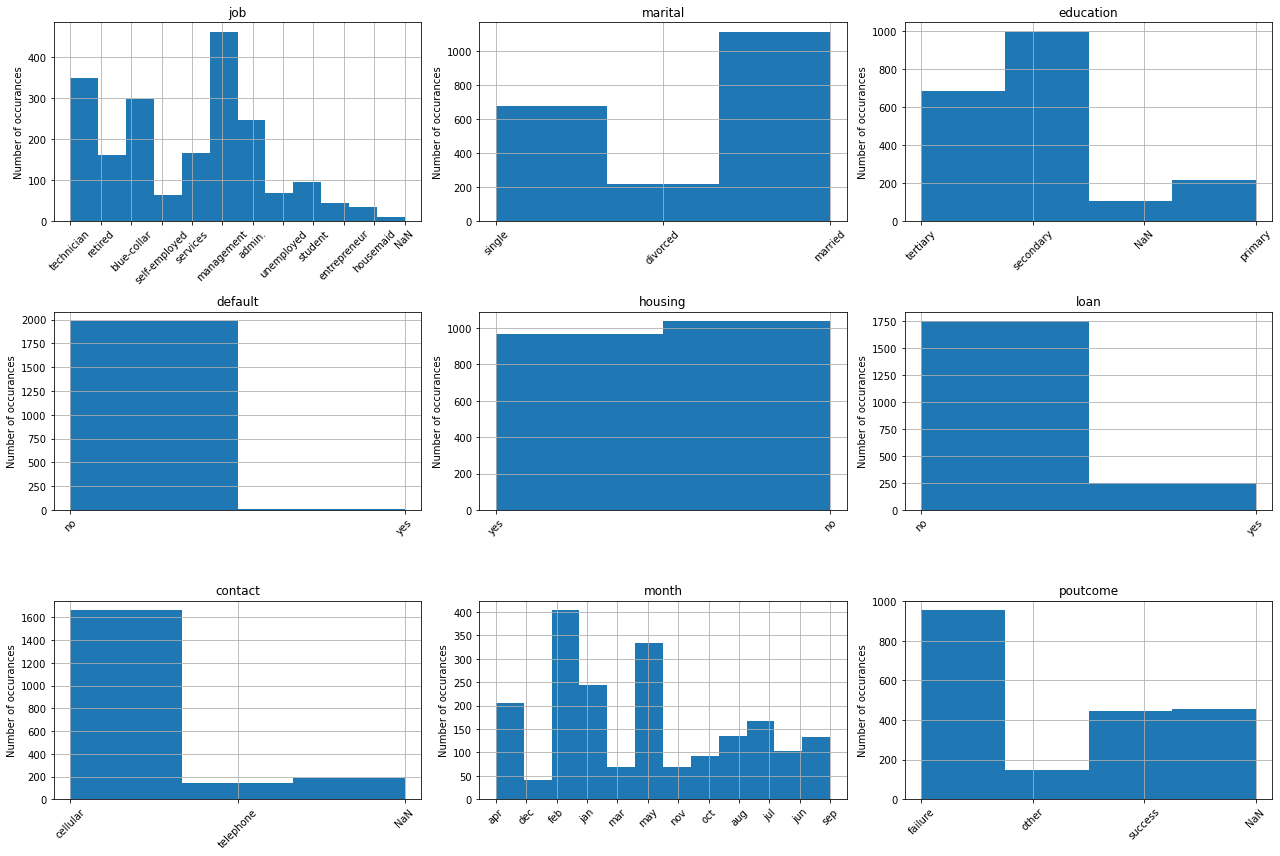

In [44]:
fig = plt.figure(figsize=(18, 12))
att_list = list(df.columns.values)
plt_idx = 1

for idx, att_name in enumerate(att_list):
    if df[att_name].dtypes == object and idx < len(att_list) -1:
        
        # Replace NaN values with a string value as it causes problems with the graph labels 
        df[att_name] = df[att_name].replace({np.nan: "NaN"})
        plt.subplot(3, 3, plt_idx)
        plt.title(att_name)
        plt.ylabel('Number of occurances')
        plt.xticks(rotation = 45)
        plt.tight_layout()

        df[att_name].hist(bins=len(df[att_name].unique()))
        plt_idx +=1

### Print pairwise plots of all numeric attributes

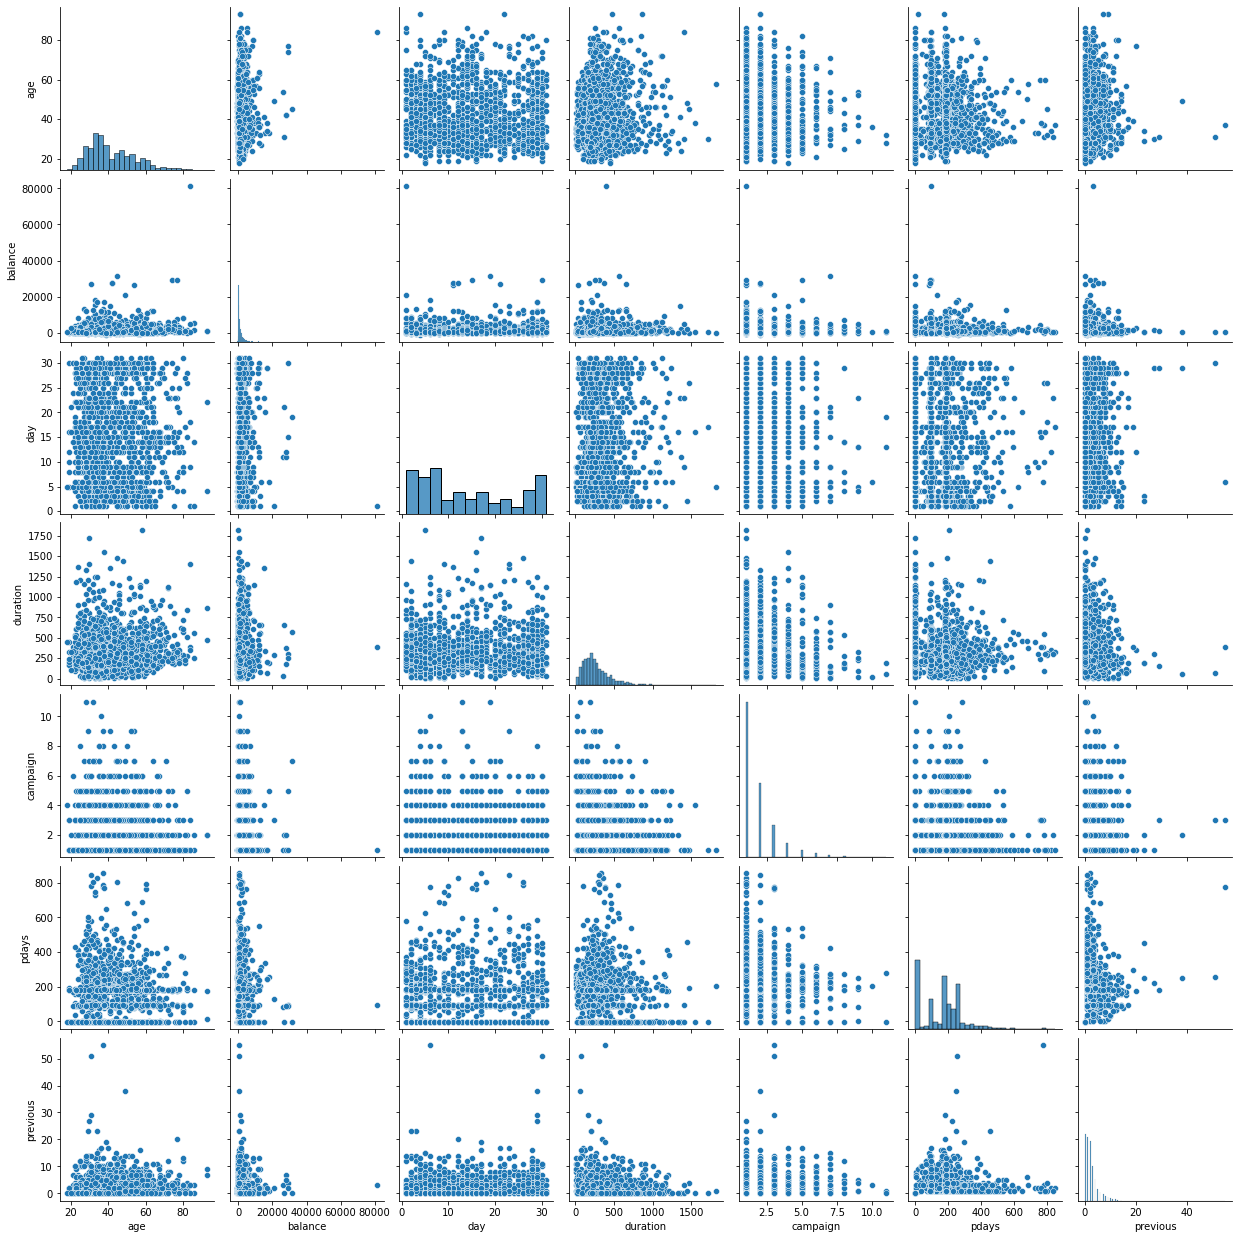

In [45]:
num_att_list = []
for idx, att_name in enumerate(list(df.columns.values)):
    if df[att_name].dtypes == 'float64' or df[att_name].dtypes == 'int64':
        num_att_list.append(att_name)
 
sns.pairplot(data=df[att_list].dropna())
plt.show()

### Distribution analysis of numerical features

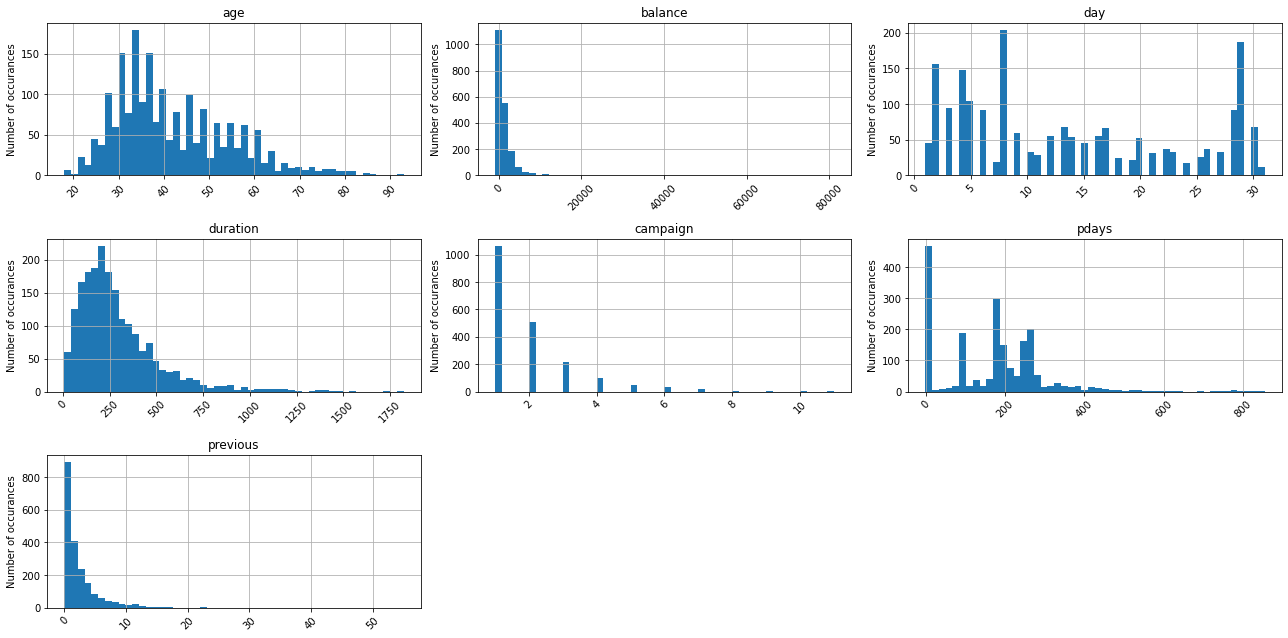

In [46]:
fig = plt.figure(figsize=(18, 9))

for idx, att_name in enumerate(num_att_list):
    plt.subplot(3, 3, idx +1)
    plt.title(att_name)
    plt.ylabel('Number of occurances')
    plt.xticks(rotation = 45)
    plt.tight_layout()

    df[att_name].hist(bins=50)

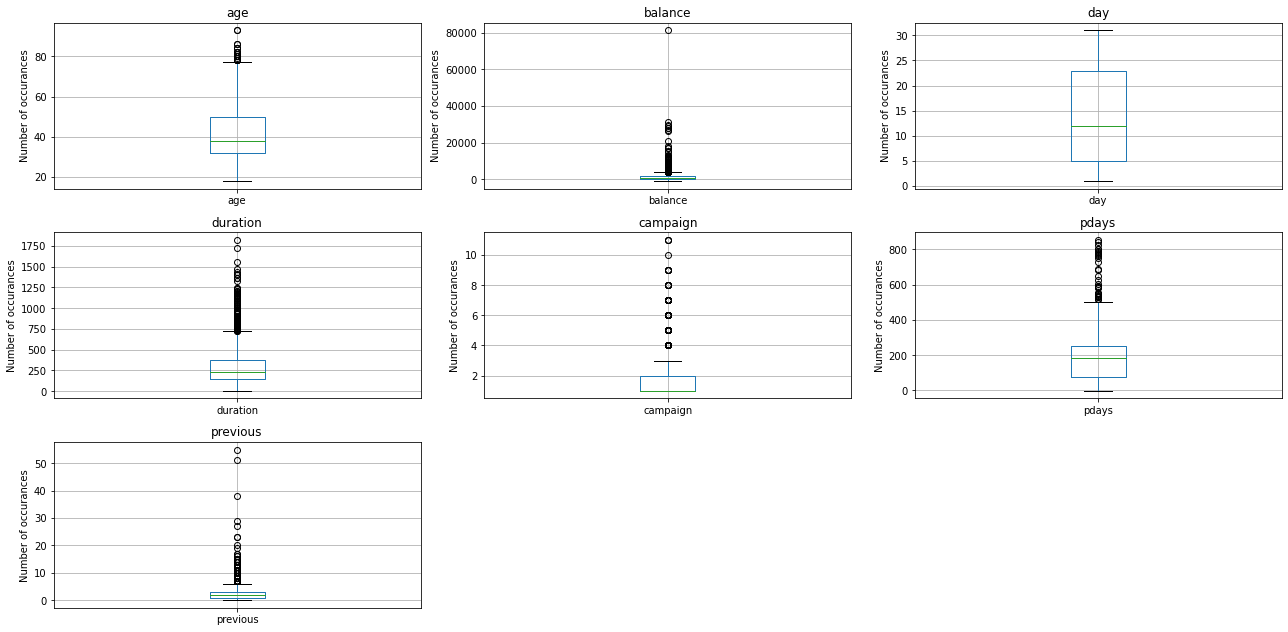

In [47]:
fig = plt.figure(figsize=(18, 9))

for idx, att_name in enumerate(num_att_list):
    plt.subplot(3, 3, idx +1)
    plt.title(att_name)
    plt.ylabel('Number of occurances')
    plt.xticks(rotation = 45)
    plt.tight_layout()

    df.boxplot(column=att_name)
plt.show()

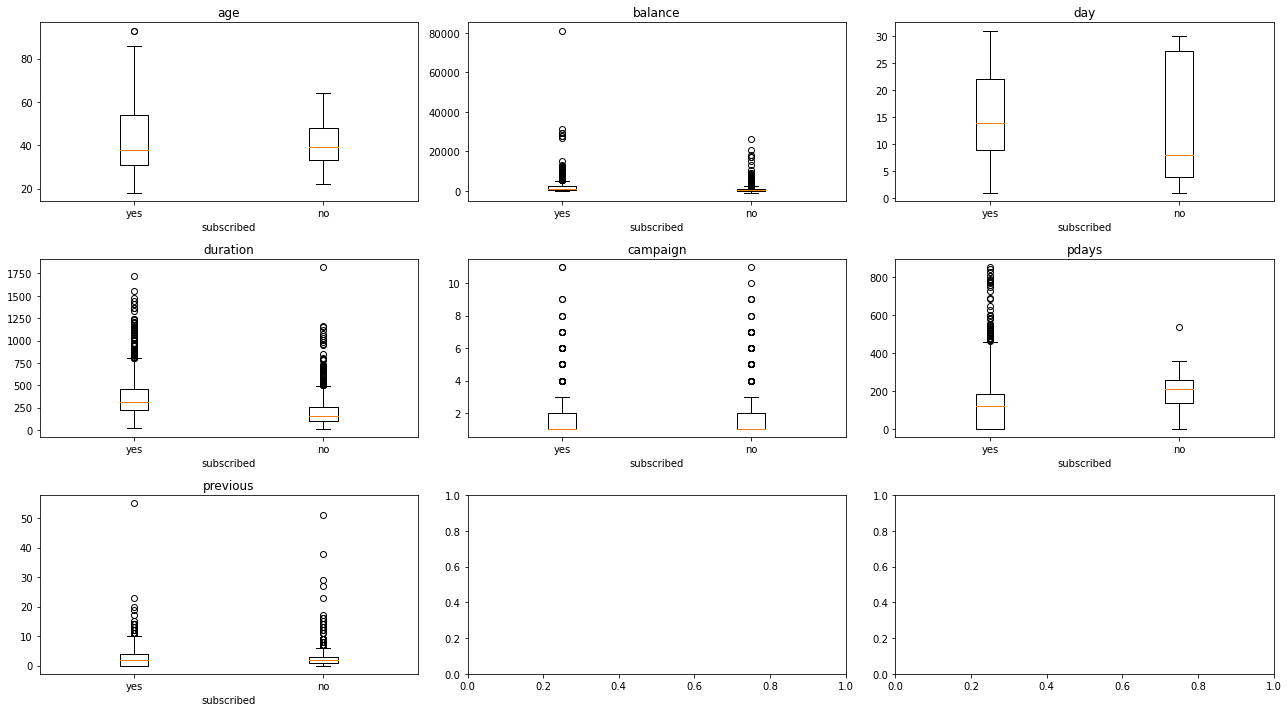

In [48]:
fig, axs = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(18)

for idx, att_name in enumerate(num_att_list):
    x_axs = idx % 3
    y_axs = int(np.floor(idx/3))

    axs[y_axs, x_axs].boxplot(
        [df.loc[df['subscribed'] == 'yes', att_name].dropna(), 
         df.loc[df['subscribed'] == 'no', att_name].dropna()])
    
    axs[y_axs, x_axs].set_title(att_name)
    axs[y_axs, x_axs].set_xticklabels(['yes', 'no'], fontdict=None, minor=False)
    axs[y_axs, x_axs].set_xlabel('subscribed')
    
fig.tight_layout()
plt.show()

We can see from the graph of the 'age' category that the subscribed examples show a more even spread off ages whereas the unsubscribed examples have a more compact age profile.

Replot attributes 'balance' and 'previous' at a larger sacle because outliers are making it difficult to read the graphs.

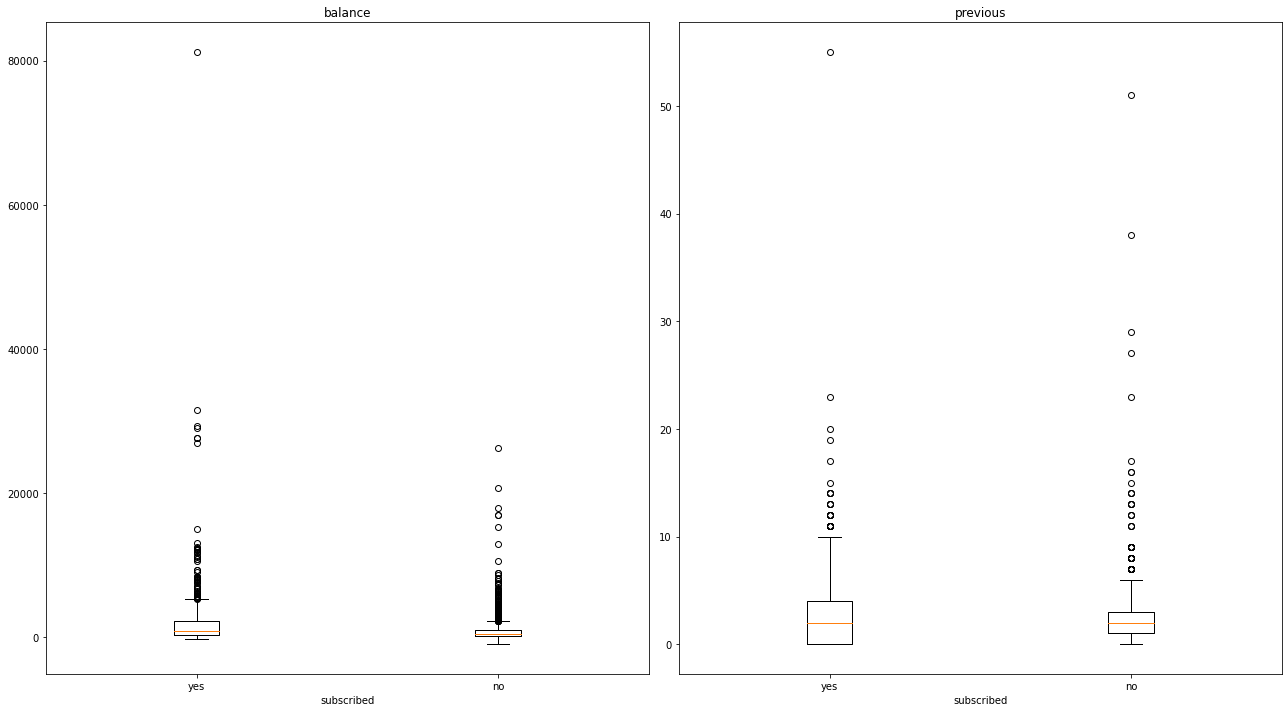

In [49]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(18)

axs[0].boxplot(
    [df.loc[df['subscribed'] == 'yes', 'balance'].dropna(), 
     df.loc[df['subscribed'] == 'no', 'balance'].dropna()])
axs[0].set_title('balance')
axs[0].set_xticklabels(['yes', 'no'], fontdict=None, minor=False)
axs[0].set_xlabel('subscribed')

axs[1].boxplot(
    [df.loc[df['subscribed'] == 'yes', 'previous'].dropna(), 
     df.loc[df['subscribed'] == 'no', 'previous'].dropna()])
axs[1].set_title('previous')
axs[1].set_xticklabels(['yes', 'no'], fontdict=None, minor=False)
axs[1].set_xlabel('subscribed')
    
fig.tight_layout()
plt.show()

We can see from the larger graphs that the half of examples have a balance of less than 551 and the average amount is 1,413. The average is skewed by an outlier with a balance of over 80,000. We can also see that example that subscribe typically have a larger balance, this makes sense as those with a larger balance should have more disposable income to save.

The 'previous' attribute is also skewed because of an outlier but we can see that those that subscribe tend to have less previous contact suggesting that more contact does not neccessarily increase the likelihood of subscription. 

### List the categories and occurrances of each categorical attribute

For each categorical attribute we list the categories and their number of occurances:

In [50]:
for idx, att_name in enumerate(list(df.columns.values)):
    if df[att_name].dtypes != 'float64' and df[att_name].dtypes != 'int64':
        
        print(f"Attribute: {att_name}\nNo. of examles: {df[att_name].count()}\
        \nCategories:\n{df[att_name].value_counts()}\n")

For each categorical attribute we list the categories and their number of occurances:

Attribute: job
No. of examles: 2000        
Categories:
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
NaN               10
Name: job, dtype: int64

Attribute: marital
No. of examles: 2000        
Categories:
married     1111
single       674
divorced     215
Name: marital, dtype: int64

Attribute: education
No. of examles: 2000        
Categories:
secondary    995
tertiary     684
primary      217
NaN          104
Name: education, dtype: int64

Attribute: default
No. of examles: 2000        
Categories:
no     1985
yes      15
Name: default, dtype: int64

Attribute: housing
No. of examles: 2000        
Categories:
no     1037
yes     963
Name: housing, dtype: int64

Attribute: loan
No. of examles: 2000        
Categori

Pie charts showing the ratios of each category in all categorical features.

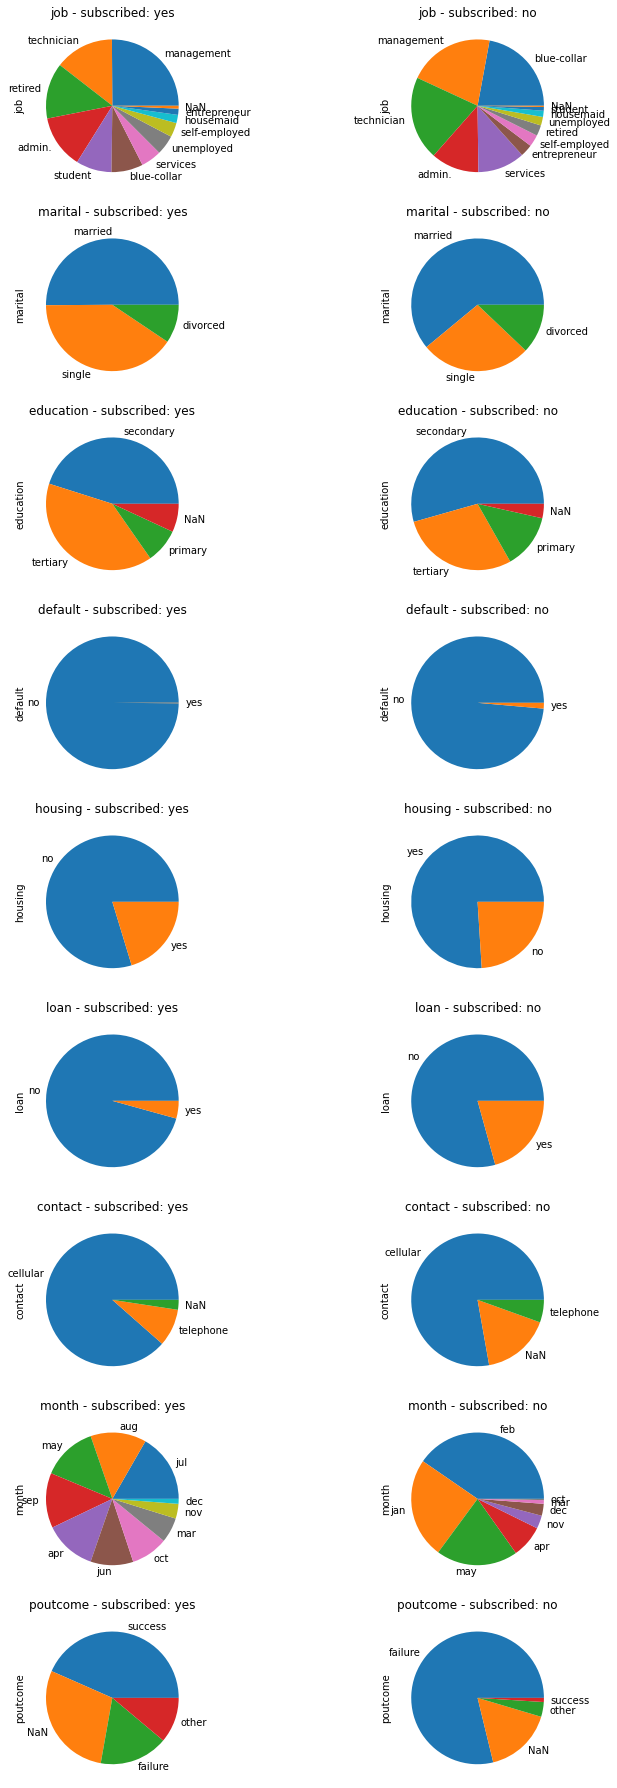

In [90]:
fig = plt.figure(figsize=(12, 36))
i = 1

for idx, att_name in enumerate(list(df.columns.values)):
    if df[att_name].dtypes != 'float64' and df[att_name].dtypes != 'int64' and att_name != 'subscribed':
        plt.subplot(10, 2, i)
        plt.title(f"{att_name} - subscribed: yes")
        count = (df.loc[df['subscribed'] == 'yes', att_name]).value_counts()
        count.plot.pie(subplots=True)
        
        plt.subplot(10, 2, i+1)
        plt.title(f"{att_name} - subscribed: no")
        count = (df.loc[df['subscribed'] == 'no', att_name]).value_counts()
        count.plot.pie(subplots=True)
        
        i+=2
        
plt.show()

Notable observations from the above pie charts: 
- A high porportion of example that subscribed had managerial jobs, suggesting a higher income and more disposable income.
- More example that did not subscribe had a secondary level of education, example that did subscribe were split quite evenly between secondry and tertiary.
- There are significantly mores examples that so not subscribe that were last contacted in January and Feburary and to a lesser extent in May.  
- A large porportion of example that do not subscribe also had a negative outcome in the previous marketing campaign.

### Plot all attributes against the target attribute

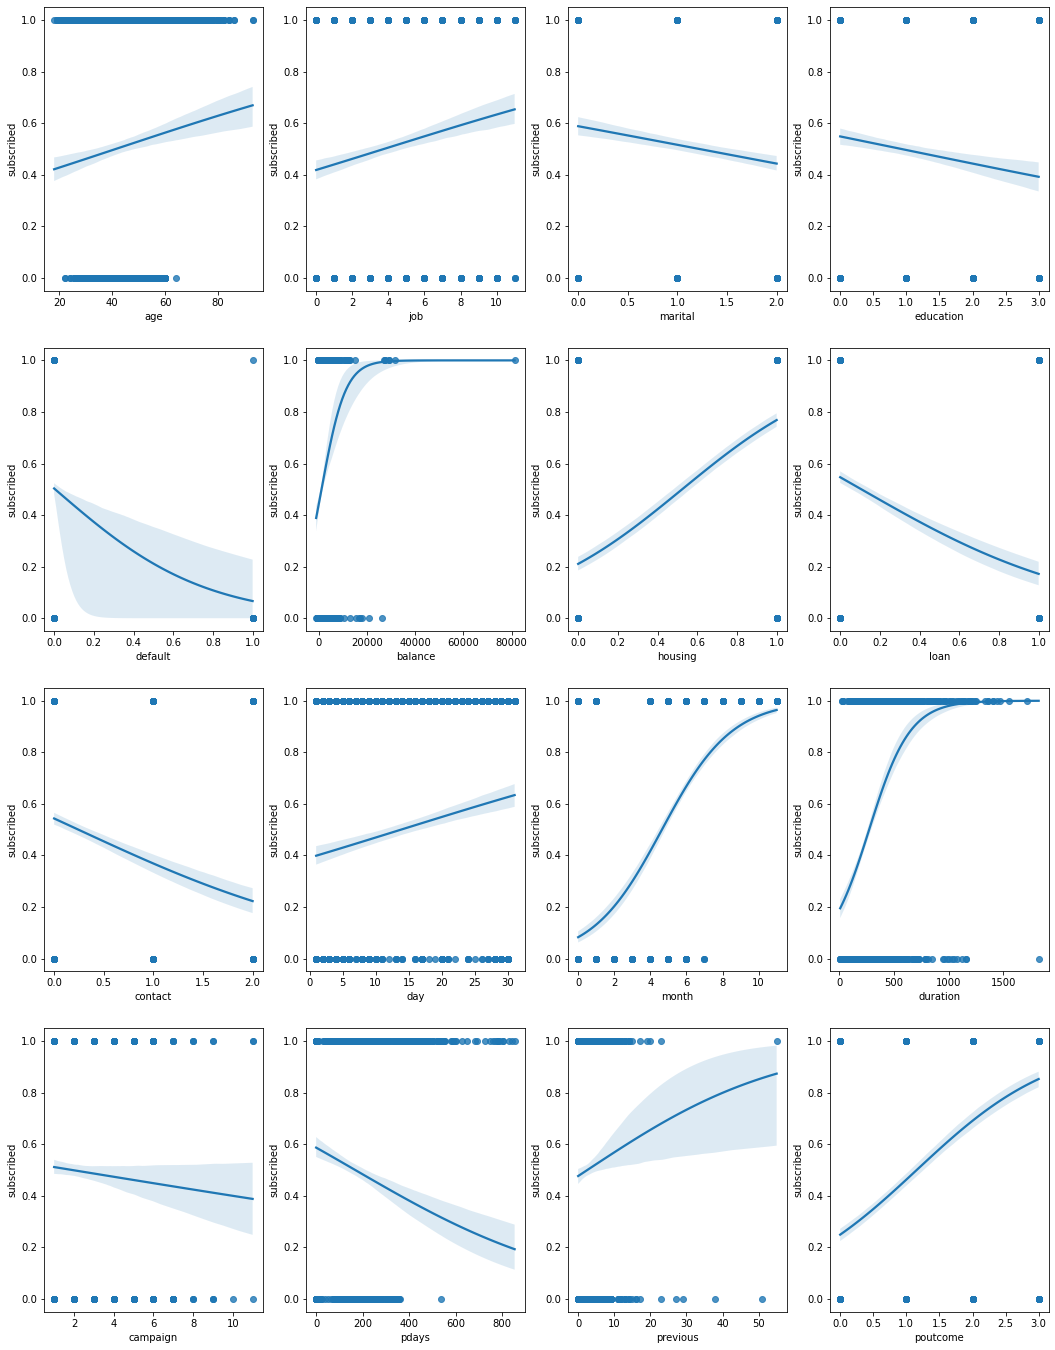

In [93]:
fig = plt.figure(figsize=(18, 24))

att_list = list(df2.columns.values)

for idx, att in enumerate(att_list):
    if idx < len(att_list) -1:
        
        plt.subplot(4, 4, idx+1)
        sns.regplot(data=df2, x=att, y='subscribed', logistic=True)